In [1]:
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [20, 8] 
SIZE = 25
matplotlib.rc('font', size=SIZE)
matplotlib.rc('axes', titlesize=SIZE)
plt.style.use('fivethirtyeight')

In [2]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_colwidth', -1)  #Veo hasta la última palabra
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
import re

In [3]:
df = pd.read_csv('reporte_Mexico_region_hopkins.csv', sep='|')

In [76]:
def graficar_muertes_region_proporcion(df, state):
    
    if state in df.STATE.unique():
        selected_state = df[df['STATE'] == state]
        selected_state.drop(['COUNTRY_REGION', 'UCI_HM', 'DELTA_UCI_HM', 'TESTS_HM', 'DELTA_TESTS_HM', 'LAST_UPDATE',
                             'STATE'], axis=1,inplace=True)
        
        deaths_cm = selected_state[['DATE', 'DEATHS_HM']]
        
        deaths_prom_cm = []
        for g, gf in df.groupby('DATE'):
            gf.set_index('STATE', inplace=True)
            deaths_prom_cm.append((g, gf.loc[state, 'DEATHS_HM'] / gf.loc['TOTAL', 'DEATHS_HM']))
            
        deaths_prom_cm = pd.DataFrame(deaths_prom_cm)
        deaths_prom_cm.columns = ['DATE', 'proms']
        deaths_cm = deaths_cm.merge(deaths_prom_cm, how='left', left_on='DATE', right_on='DATE').set_index('DATE')
        
        
        ## Graficar
        plt.rcParams['figure.figsize'] = [20, 8] 
        SIZE = 25
        matplotlib.rc('font', size=SIZE)
        matplotlib.rc('axes', titlesize=SIZE)

        fig, ax1 = plt.subplots(figsize=(17,7))
        ax2 = ax1.twinx()
        
        ax1.title.set_text(f'Deaths {state}')
        ax1.bar(deaths_cm.index, deaths_cm['DEATHS_HM']) #, 'b-')
        ax1.set_ylabel('Deaths', color='b')
           
                   
        ax2.set_ylabel('Promedio del Total', color='k', fontsize=20, rotation=-90, labelpad=20, fontweight='bold')

        ax2.plot(deaths_cm.index, deaths_cm['proms'], color='k')
        
        xticks = deaths_cm.index[::-3][::-1]
        xticks_labels = [re.findall(r"\d{2}", x)[-2:] for x in xticks]
        xticks_labels = ['/'.join((x[1], x[0])) for x in xticks_labels]

        max_tick = round(deaths_cm['proms'].max(), 2)
        min_tick = round(deaths_cm['proms'].min(), 2)
        mean_tick = round(deaths_cm['proms'].mean(), 2)
        yticks = [round(mean_tick * 0.55, 2), min_tick, max_tick, round(mean_tick * 1.45, 2)]
        ylabels = [str(int(y*100)) + '%' for y in yticks]
        
        ma_proms = list(deaths_cm['proms'].rolling(window=4).mean())

        ax2.plot(deaths_cm.index, ma_proms, 'r--', linewidth=2)
        
        ax1.set_xticks(xticks);
        ax1.set_xticklabels(xticks_labels)
        
        ax1.tick_params(axis='both', labelsize=20)
        ax1.tick_params(axis='x', rotation=0)
        
        ax2.set_yticks(yticks)
        ax2.set_yticklabels(ylabels)
        ax2.set_ylim(yticks[0], yticks[-1])

        ax2.tick_params(axis='y', labelsize=20)
        
        
        
        plt.grid(False);
        
        if state == 'TOTAL':
            ax2.set_visible(False)
        else: 
            ax2.set_visible(True)
        
        plt.show()
        
        if state != 'TOTAL':
            print(f'\t\t\t\tpercentage from total from {state} in {deaths_cm.index[-1]} is {round(deaths_cm.proms[-1]*100, 2)}%')
        
    else:
        print('asd')

In [59]:
top_states = list(df[df['DATE'] == df['DATE'].max()].sort_values(by='DEATHS_HM', ascending=False).head(5)['STATE'])

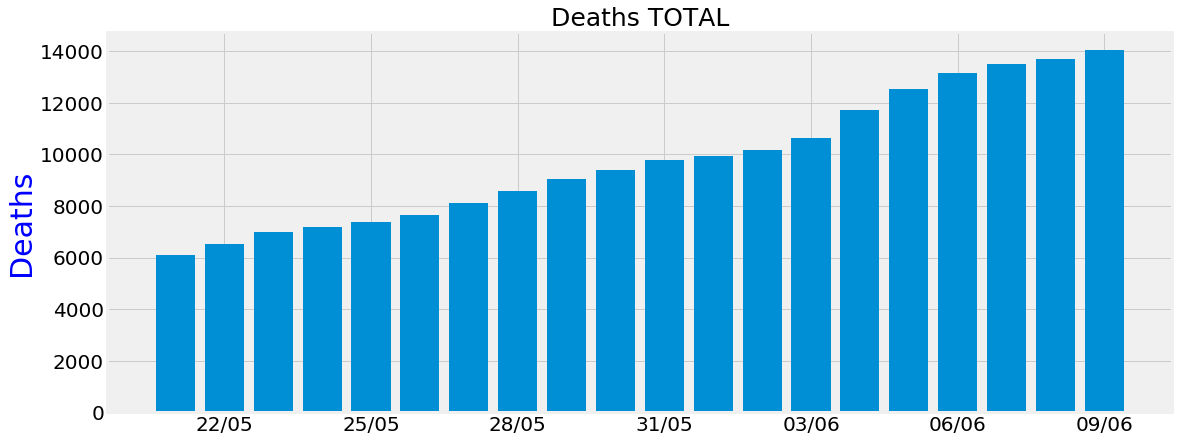

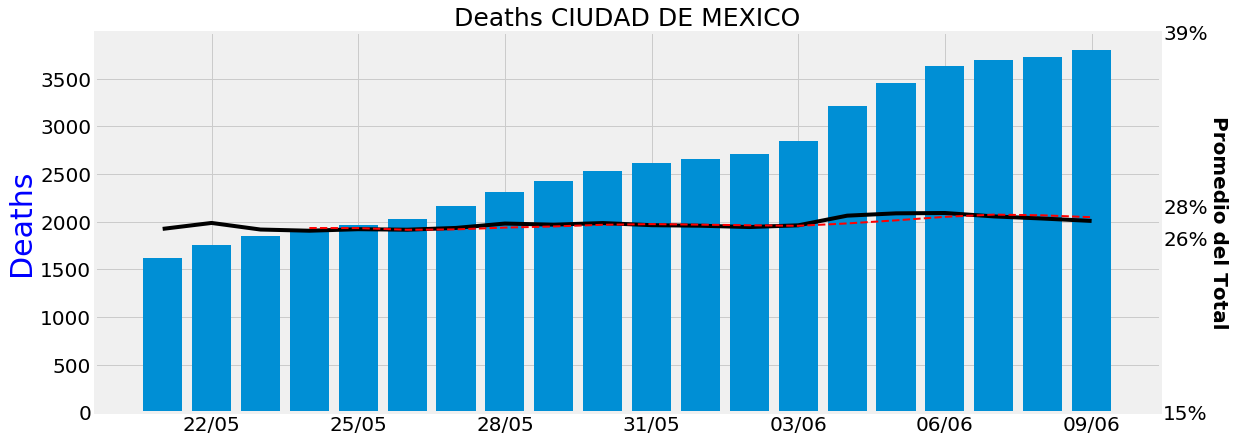

				percentage from total from CIUDAD DE MEXICO in 2020-06-09 is 27.07%


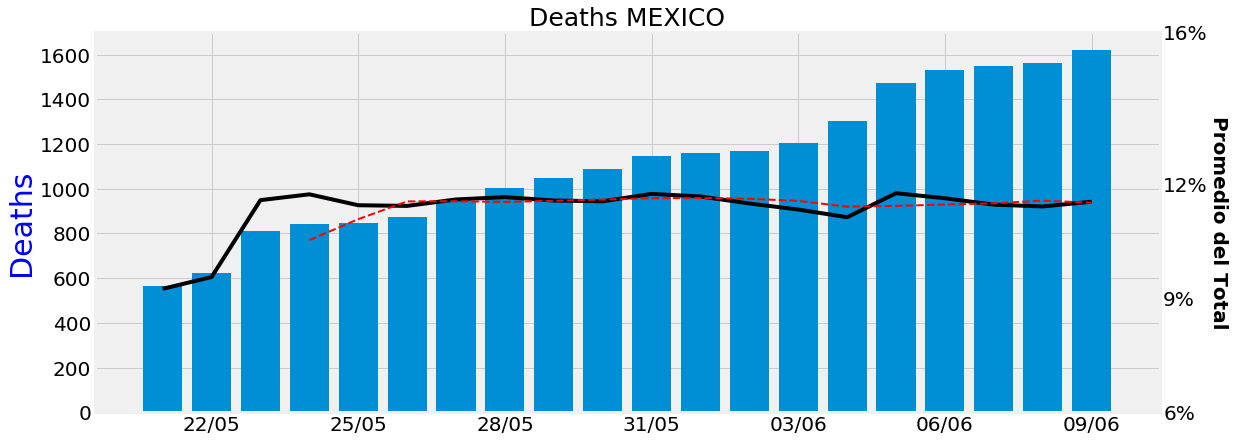

				percentage from total from MEXICO in 2020-06-09 is 11.53%


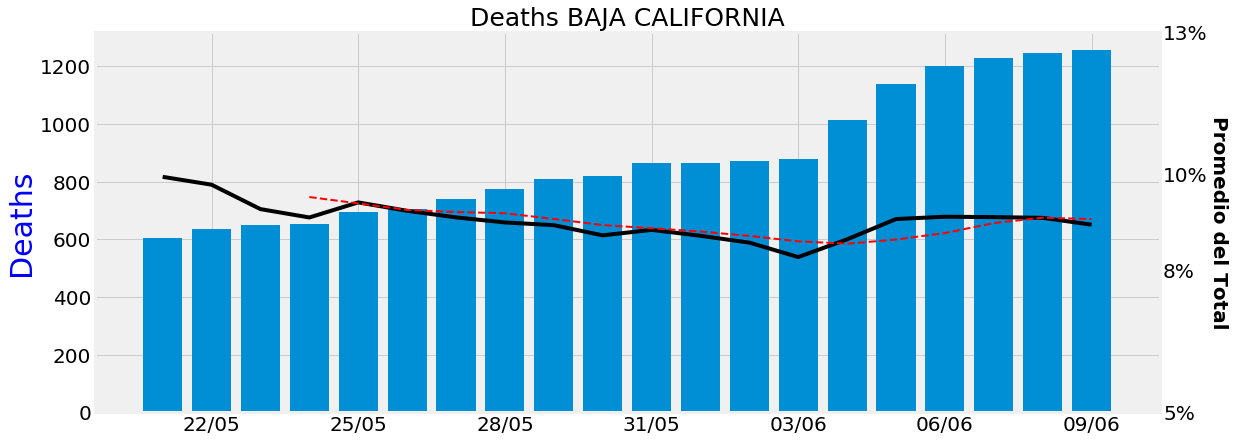

				percentage from total from BAJA CALIFORNIA in 2020-06-09 is 8.94%


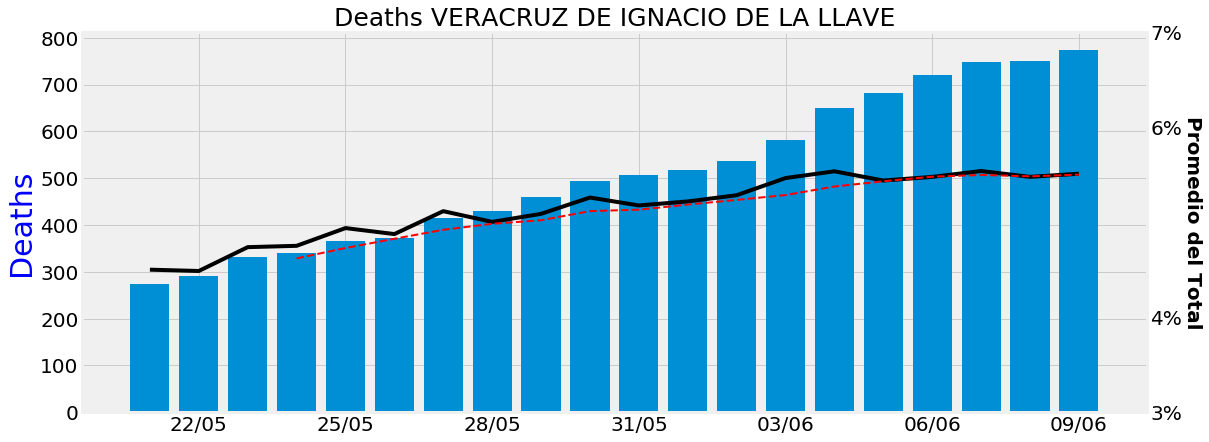

				percentage from total from VERACRUZ DE IGNACIO DE LA LLAVE in 2020-06-09 is 5.51%


In [77]:
for state in top_states:
    graficar_muertes_region_proporcion(df, state)

In [43]:
ciudad_mexico = df[df['STATE'] == 'CIUDAD DE MEXICO']

In [44]:
ciudad_mexico.drop(['COUNTRY_REGION', 'UCI_HM', 'DELTA_UCI_HM', 'TESTS_HM', 'DELTA_TESTS_HM', 'LAST_UPDATE', 'STATE'], axis=1,
                   inplace=True)

In [45]:
ciudad_mexico.set_index('DATE', inplace=True)

In [46]:
deaths_cm = ciudad_mexico['DEATHS_HM']
deaths_cm = deaths_cm.reset_index()

In [47]:
deaths_prom_cm = []
for g, gf in df.groupby('DATE'):
    gf.set_index('STATE', inplace=True)
    deaths_prom_cm.append((g, gf.loc['CIUDAD DE MEXICO', 'DEATHS_HM'] / gf.loc['TOTAL', 'DEATHS_HM']))
deaths_prom_cm = pd.DataFrame(deaths_prom_cm)
deaths_prom_cm.columns = ['DATE', 'proms']

In [48]:
deaths_cm = deaths_cm.merge(deaths_prom_cm, how='left', left_on='DATE', right_on='DATE').set_index('DATE')

In [49]:
deaths_cm.columns

Index(['DEATHS_HM', 'proms'], dtype='object')

In [50]:
xticks = deaths_cm.index[::-3][::-1]
xticks_labels = [re.findall(r"\d{2}", x)[-2:] for x in xticks]
xticks_labels = ['/'.join((x[1], x[0])) for x in xticks_labels]

In [53]:
max_tick = round(deaths_cm['proms'].max(), 2)
min_tick = round(deaths_cm['proms'].min(), 2)

mean_tick = round(deaths_cm['proms'].mean(), 2)
yticks = [round(mean_tick * 0.55, 2), min_tick, max_tick, round(mean_tick * 1.45, 2)]

ylabels = [str(int(y*100)) + '%' for y in yticks]



[nan,
 0.2675565443084909,
 0.2673528228141699,
 0.26489776155318273,
 0.2650035249551793,
 0.2653249732336504,
 0.26572703302481804,
 0.26766849524277814,
 0.2687010262006273,
 0.2688560593480201,
 0.26869036182913764,
 0.2678485156397471,
 0.26725871302718907,
 0.2673881989151018,
 0.27097717175651787,
 0.2747549490263731,
 0.2755952980810463,
 0.2746286175211884,
 0.2728822657736727,
 0.2714495914118039]

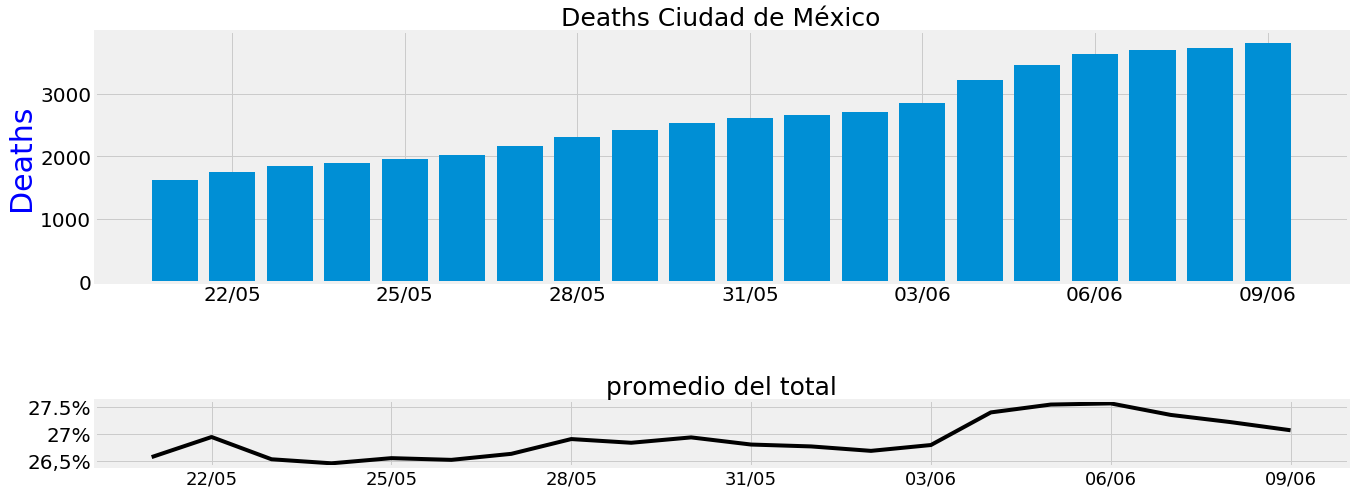

In [21]:
plt.rcParams['figure.figsize'] = [20, 8] 
SIZE = 25
matplotlib.rc('font', size=SIZE)
matplotlib.rc('axes', titlesize=SIZE)

from matplotlib.gridspec import GridSpec

fig=plt.figure()

gs=GridSpec(5,1, hspace=0.4) # 4 rows, 1 columns

ax1=fig.add_subplot(gs[0:3,0]) # First row, first column
ax2=fig.add_subplot(gs[4,0]) # First row, second column

ax1.title.set_text('Deaths Ciudad de México')
ax1.bar(deaths_cm.index, deaths_cm['DEATHS_HM']) #, 'b-')
ax1.set_ylabel('Deaths', color='b')

xticks = deaths_cm.index[::-3][::-1]
xticks_labels = [re.findall(r"\d{2}", x)[-2:] for x in xticks]
xticks_labels = ['/'.join((x[1], x[0])) for x in xticks_labels]

ax1.set_xticks(xticks);
ax1.set_xticklabels(xticks_labels)

ax2.title.set_text('promedio del total')
ax2.plot(deaths_cm.index, deaths_cm['proms'], color='k')
ax2.set_xticks(xticks)
ax2.set_xticklabels(xticks_labels)
ax2.set_yticks([0.265, 0.270, 0.275])
ax2.set_yticklabels(["26,5%", "27%", "27.5%"])

ax1.tick_params(axis='both', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
ax2.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='x', rotation=0)
ax2.tick_params(axis='x', rotation=0);

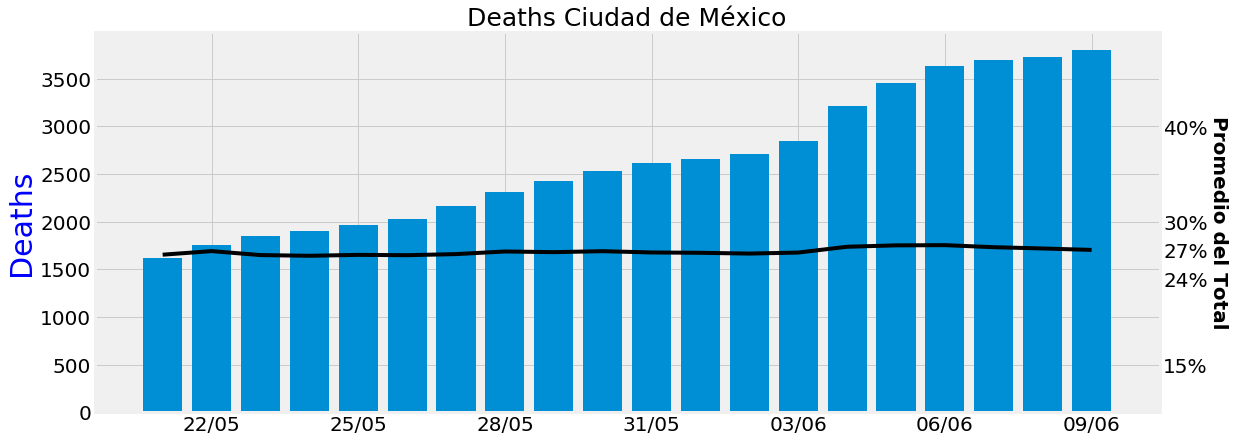

In [22]:
plt.rcParams['figure.figsize'] = [20, 8] 
SIZE = 25
matplotlib.rc('font', size=SIZE)
matplotlib.rc('axes', titlesize=SIZE)

fig, ax1 = plt.subplots(figsize=(17,7))
ax2 = ax1.twinx()

ax1.title.set_text('Deaths Ciudad de México')
ax1.bar(deaths_cm.index, deaths_cm['DEATHS_HM']) #, 'b-')
ax1.set_ylabel('Deaths', color='b')
ax2.set_ylabel('Promedio del Total', color='k', fontsize=20, rotation=-90, labelpad=20, fontweight='bold')

ax2.plot(deaths_cm.index, deaths_cm['proms'], color='k')

ax2.set_yticks([0.15, 0.24, 0.270, 0.3, 0.40])
ax2.set_yticklabels(["15%", "24%", "27%", "30%", "40%"])
ax2.set_ylim(0.1, 0.5)

xticks = deaths_cm.index[::-3][::-1]
xticks_labels = [re.findall(r"\d{2}", x)[-2:] for x in xticks]
xticks_labels = ['/'.join((x[1], x[0])) for x in xticks_labels]

ax1.set_xticks(xticks);
ax1.set_xticklabels(xticks_labels)

ax1.tick_params(axis='both', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
# ax2.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='x', rotation=0)
plt.grid(False);